# Movie recommendations
In this project the previously merged and cleaned dataframe is read and processed for use in training the ML algorithm

In [1]:
# load libraries for preporcossing
import pandas as pd
import numpy as np
import seaborn as sns

In [8]:
# read the previously created dataframe of movie features
movies = pd.read_csv("C:\\Users\\heyle\\Downloads\\MLPQ1.csv")

In [9]:
# display the dataframe that is to be used
movies

,user_id,item_id,rating,timestamp,imdbId
0,1,1,4.0,964982703,114709
1,1,1,4.0,964982703,114709
2,1,1,4.0,964982703,114709
3,5,1,4.0,847434962,114709
4,5,1,4.0,847434962,114709
...,...,...,...,...,...
211568,586,187595,5.0,1529899556,3778644
211569,184,193565,3.5,1537098554,1636780
211570,184,193565,3.5,1537098554,1636780
211571,184,193565,3.5,1537098554,1636780


The data has to be split into the features matrix and the target vector. This will allow us to work with the data and preprocess it with respect to how it is to be used in the training of the algorithm.

Note that the target vector and feature matrix consists of 10 001 rows each. This is to overcome system performance failure when fitting the data to the algorithm and performing processing on the data.  

In [10]:
# create target vector
target = movies["item_id"]
target = target.loc[0:10000]
target

0          1
1          1
2          1
3          1
4          1
        ... 
9996     161
9997     161
9998     161
9999     161
10000    161
Name: item_id, Length: 10001, dtype: int64

In [11]:
# create features matrix
movies.drop("item_id", axis=1, inplace=True)
features = movies.loc[0:10000]
features

,user_id,rating,timestamp,imdbId
0,1,4.0,964982703,114709
1,1,4.0,964982703,114709
2,1,4.0,964982703,114709
3,5,4.0,847434962,114709
4,5,4.0,847434962,114709
...,...,...,...,...
9996,372,4.0,874415062,112740
9997,374,4.0,849089153,112740
9998,376,5.0,1364993850,112740
9999,379,4.0,847397381,112740


A correlation matrix is used below to show the correlation value between the features. 

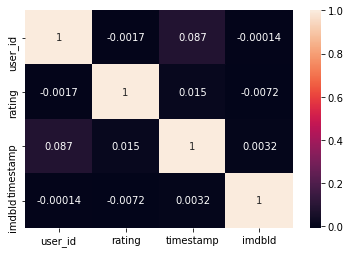

In [13]:
# create correlation matrix
corr = features.corr()
sns.heatmap(corr, annot=True)

A distplot function is used below to show the univariate distribution of observations included in the plotting of the data.

Skewness: 0.5342494134239462
Kurtosis: -0.956990472031277


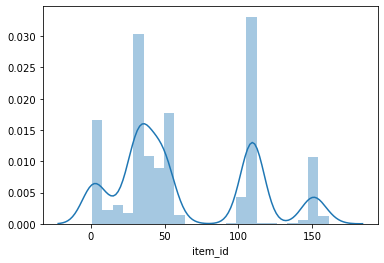

In [14]:
# create distribution plot
sns.distplot(target)
print("Skewness:", target.skew())
print("Kurtosis:", target.kurtosis())

It can be observed that the target data is positively skewed. The curtosis value is negative indicating that most of the data points are situated close to the mean.

### Model Selection
In this section the best suited algorithm is selected and implemented. That model is then fit to the data and trained to make accurate predictions.

In [15]:
# import sklearn libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [18]:
# assign features and target to x and y to be split
x = features
y = target

In [19]:
# split the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [24]:
# create list of candidate algorithms
# a list to keep track of each models score
modelScores = []
candidateList = [["RandomForestRegressor", RandomForestRegressor()],
                ["GradienTboostingRegressor", GradientBoostingRegressor()],
                ["LinearRegression", LinearRegression()],
                ["LogisticRegression", LogisticRegression()]]
# use a for loop to iterate the list above and calculat eeach algorithms performance
for mod in candidateList:
    modelName = mod[0]
    model = mod[1]
    model.fit(x_train, y_train)
    trainScore = model.score(x_train, y_train)
    testScore = model.score(x_test, y_test)
    # append the scores to the appropriate list
    modelScores.append(["Model:", modelName, "Train score:", trainScore, "Test score:", testScore])
    # the scores are placed into a dataframe for visualisation of the results
scoreFrame = pd.DataFrame(data=modelScores)
scoreFrame

,0,1,2,3,4,5
0,Model:,RandomForestRegressor,Train score:,0.999901,Test score:,0.999882
1,Model:,GradienTboostingRegressor,Train score:,0.992773,Test score:,0.990820
2,Model:,LinearRegression,Train score:,0.057243,Test score:,0.046431
3,Model:,LogisticRegression,Train score:,0.220375,Test score:,0.208396


In [25]:
# implement best performing model for the case
model = RandomForestRegressor()

In [27]:
# fit the data to the model
model.fit(x_train, y_train)

RandomForestRegressor()

In [28]:
# the models prediction and score is printed and can be compared to the y_test data
print(model.predict(x_test))
print(y_test)
print(model.score(x_test, y_test))

[ 11.  39.  41. ... 110.  32. 150.]
1239     11
4229     39
4514     41
5505     50
590       1
       ... 
3235     32
3714     34
7632    110
2199     32
9447    150
Name: item_id, Length: 2001, dtype: int64
0.9997292546599176


### Model Pickleing
This section consists of pickleing the above model for further use on predicting and recommending movies to viewers.

In [29]:
# load pickle library
import pickle

In [30]:
# dump the created model into a pickled file for later use
with open("MLA", "wb") as f:
    pickle.dump(model, f)

In [31]:
# load the dumped and pickled model for further use
with open("MLA", "rb") as m:
    mp = pickle.load(m)

### Predictions
Here the pickled model is used to make predictions on data that has not been included in the training of the model. This mean that the data is completely new to the model but still has the same feature values as the data used to train the model.

In [53]:
# use external data to predict
# select random rows from externam data from the movies data
predict_1 = movies.loc[11000]
predict_2 = movies.loc[12000]
predict_3 = movies.loc[101000]
predict_4 = movies.loc[133000]
predict_5 = movies.loc[141000]
# populate a list with all rows used for the prediction
predList = [predict_1, predict_2, predict_3, predict_4, predict_5]
# populate a dataframe with the prediction rows for visualisation
predFrame = pd.DataFrame(data=predList)
predFrame

,user_id,rating,timestamp,imdbId
11000,307.0,3.0,1.186162e+09,109642.0
12000,71.0,3.0,8.647380e+08,76759.0
101000,122.0,5.0,1.461562e+09,79470.0
133000,452.0,5.0,1.019585e+09,158983.0
141000,295.0,4.5,1.320065e+09,137523.0


In [54]:
# make the prediction
mp.predict(predFrame)

array([ 58., 111., 111., 140., 140.])

In [57]:
# place the predicted values into a list
predList = [mp.predict(predFrame)]
predList

[array([ 58., 111., 111., 140., 140.])]

### Saving the predictions
Here the predictions made on the external data is written to a text file and stoted.

In [64]:
# write the predictions to a text file
with open("predictions","w+") as pr:
    pr.write(str(predList))

In [65]:
# read the predictions file to enu=sure writing process was successful
with open("predictions", "r") as re:
    for line in re:
        print(line)

[array([ 58., 111., 111., 140., 140.])]
